<a href="https://colab.research.google.com/github/Sai0210/Home_Assignment_5/blob/main/Question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid, save_image
import matplotlib.pyplot as plt
import os
import numpy as np

In [15]:
# Hyperparameters
latent_dim = 100
batch_size = 128
lr = 0.0002
epochs = 100
image_dir = "gan_images"

os.makedirs(image_dir, exist_ok=True)

In [16]:
# Device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# MNIST loader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
mnist = datasets.MNIST(root='.', train=True, transform=transform, download=True)
loader = DataLoader(mnist, batch_size=batch_size, shuffle=True)

In [17]:
# Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.gen = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, z):
        return self.gen(z).view(-1, 1, 28, 28)

In [18]:
# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.dis = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.dis(x)

Epoch 0/100 | D Loss: 0.3334 | G Loss: 5.5470


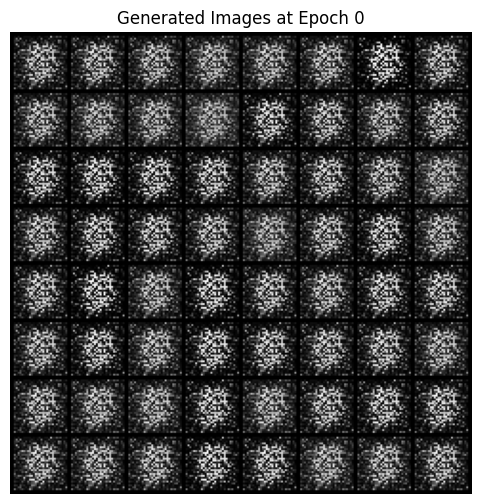

Saved samples at epoch 0
Epoch 1/100 | D Loss: 0.0014 | G Loss: 7.0473
Epoch 2/100 | D Loss: 0.0450 | G Loss: 14.3246
Epoch 3/100 | D Loss: 1.3206 | G Loss: 5.3196
Epoch 4/100 | D Loss: 0.9402 | G Loss: 1.6389
Epoch 5/100 | D Loss: 0.9606 | G Loss: 1.9793
Epoch 6/100 | D Loss: 1.2421 | G Loss: 1.5397
Epoch 7/100 | D Loss: 0.6053 | G Loss: 3.7178
Epoch 8/100 | D Loss: 1.8337 | G Loss: 1.0049
Epoch 9/100 | D Loss: 2.1603 | G Loss: 0.9656
Epoch 10/100 | D Loss: 0.6438 | G Loss: 1.7523
Epoch 11/100 | D Loss: 0.2989 | G Loss: 3.1784
Epoch 12/100 | D Loss: 0.3278 | G Loss: 3.9044
Epoch 13/100 | D Loss: 1.3447 | G Loss: 3.1440
Epoch 14/100 | D Loss: 0.3405 | G Loss: 3.9965
Epoch 15/100 | D Loss: 0.8145 | G Loss: 4.1897
Epoch 16/100 | D Loss: 0.5889 | G Loss: 4.0984
Epoch 17/100 | D Loss: 0.2367 | G Loss: 5.0201
Epoch 18/100 | D Loss: 0.0925 | G Loss: 4.6898
Epoch 19/100 | D Loss: 0.4275 | G Loss: 4.9261
Epoch 20/100 | D Loss: 0.9199 | G Loss: 6.5002
Epoch 21/100 | D Loss: 0.2528 | G Loss: 6.3

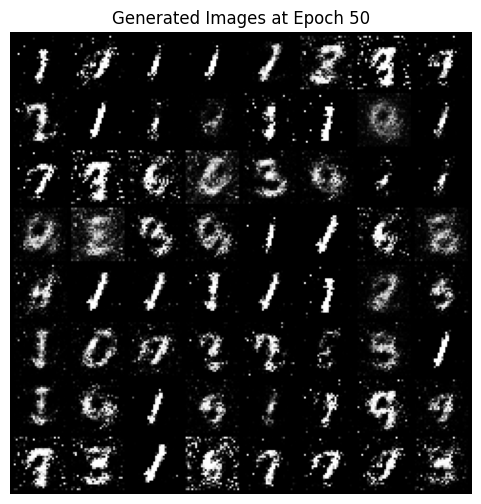

Saved samples at epoch 50
Epoch 51/100 | D Loss: 0.5943 | G Loss: 3.3552
Epoch 52/100 | D Loss: 0.5324 | G Loss: 2.8809
Epoch 53/100 | D Loss: 0.3083 | G Loss: 3.1637
Epoch 54/100 | D Loss: 0.4911 | G Loss: 3.6881
Epoch 55/100 | D Loss: 0.7064 | G Loss: 2.1480
Epoch 56/100 | D Loss: 0.4071 | G Loss: 3.1358
Epoch 57/100 | D Loss: 0.5706 | G Loss: 2.6409
Epoch 58/100 | D Loss: 0.5213 | G Loss: 2.7323
Epoch 59/100 | D Loss: 0.5691 | G Loss: 2.6644
Epoch 60/100 | D Loss: 0.7095 | G Loss: 1.9909
Epoch 61/100 | D Loss: 0.7872 | G Loss: 2.1593
Epoch 62/100 | D Loss: 0.8401 | G Loss: 2.1260
Epoch 63/100 | D Loss: 0.8280 | G Loss: 2.8359
Epoch 64/100 | D Loss: 0.5695 | G Loss: 2.1034
Epoch 65/100 | D Loss: 0.5947 | G Loss: 2.9142
Epoch 66/100 | D Loss: 0.9560 | G Loss: 1.4104
Epoch 67/100 | D Loss: 0.5857 | G Loss: 1.8486
Epoch 68/100 | D Loss: 0.6412 | G Loss: 2.0731
Epoch 69/100 | D Loss: 0.9053 | G Loss: 2.3587
Epoch 70/100 | D Loss: 0.6081 | G Loss: 2.2350
Epoch 71/100 | D Loss: 0.5537 | G 

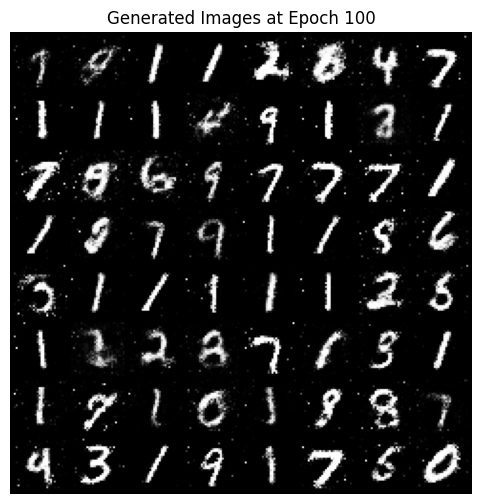

Saved samples at epoch 100


In [22]:

# Instantiate
G = Generator().to(device)
D = Discriminator().to(device)

# Loss and optimizers
loss_fn = nn.BCELoss()
opt_G = optim.Adam(G.parameters(), lr=lr)
opt_D = optim.Adam(D.parameters(), lr=lr)

# Fixed noise for image generation
fixed_noise = torch.randn(64, latent_dim, device=device)

# Store losses
G_losses = []
D_losses = []

def save_and_show_sample(epoch):
    G.eval()
    with torch.no_grad():
        fake_images = G(fixed_noise)
        grid = make_grid(fake_images, nrow=8, normalize=True)
        save_image(grid, f"{image_dir}/epoch_{epoch}.png")

        # Show the image
        npimg = grid.cpu().numpy()
        plt.figure(figsize=(6, 6))
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.title(f"Generated Images at Epoch {epoch}")
        plt.axis("off")
        plt.show()
    G.train()


# Training loop
for epoch in range(epochs+1):
    for real, _ in loader:
        real = real.to(device)
        batch_size = real.size(0)

        # Real and fake labels
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        z = torch.randn(batch_size, latent_dim).to(device)
        fake = G(z)
        D_real = D(real)
        D_fake = D(fake.detach())
        D_loss = loss_fn(D_real, real_labels) + loss_fn(D_fake, fake_labels)

        opt_D.zero_grad()
        D_loss.backward()
        opt_D.step()

        # Train Generator
        z = torch.randn(batch_size, latent_dim).to(device)
        fake = G(z)
        D_fake = D(fake)
        G_loss = loss_fn(D_fake, real_labels)

        opt_G.zero_grad()
        G_loss.backward()
        opt_G.step()

    # Save losses
    G_losses.append(G_loss.item())
    D_losses.append(D_loss.item())

    # Save sample images
    print(f"Epoch {epoch}/{epochs} | D Loss: {D_loss.item():.4f} | G Loss: {G_loss.item():.4f}")

    if epoch in [0, 50, 100]:
        save_and_show_sample(epoch)
        print(f"Saved samples at epoch {epoch}")



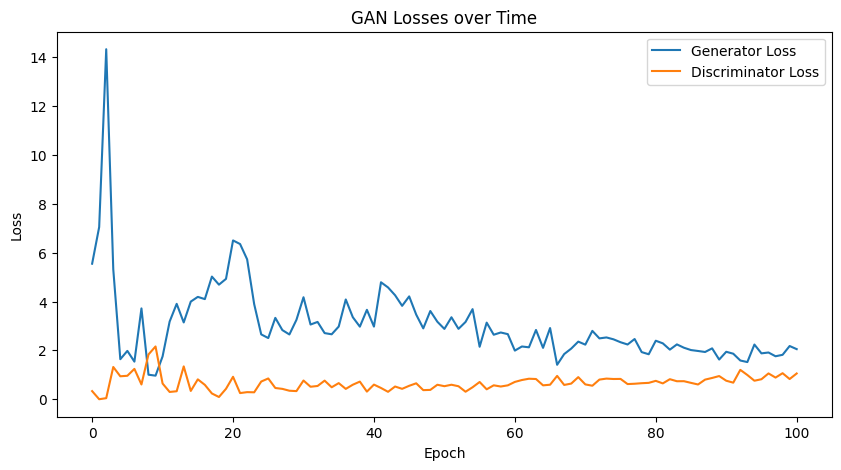

In [23]:
# Plot losses
plt.figure(figsize=(10, 5))
plt.plot(G_losses, label="Generator Loss")
plt.plot(D_losses, label="Discriminator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("GAN Losses over Time")
plt.savefig("gan_losses.png")
plt.show()